In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")

In [2]:
# Importing the dataset
dataset = pd.read_csv('../Data/train_titanic.csv')
dataset = dataset[dataset['Age'].notnull()]
cat_cols = ['Sex' ]
dataset = pd.get_dummies(dataset, columns = cat_cols)
X = dataset[['Pclass','Age','Sex_male']].values
y = dataset['Survived'].values


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =10)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [8]:
#Compute the accuracy score
acc_score = accuracy_score(y_test, y_pred)

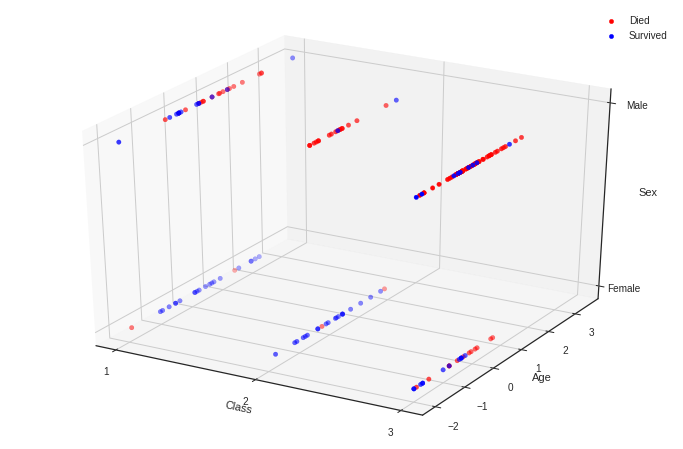

In [11]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

died = np.where(y_test==0)[0]
survived = np.where(y_test==1)[0]

p=ax.scatter(xs = X_test[died,0], ys =X_test[died,1], zs=X_test[died,2], 
             zdir='z', s=20, c='red',label = 'Died')
p=ax.scatter(xs = X_test[survived,0], ys =X_test[survived,1], zs=X_test[survived,2], 
             zdir='z', s=20, c='blue',label = 'Survived')

ax.set_xlabel('Class')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
ax.legend()
#ax.set_zticks([-1.33117269, 0.75121734]
ax.zaxis.set_ticks(np.unique(X_test[:,2]))
ax.zaxis.set_ticklabels(['Female','Male'])

ax.xaxis.set_ticks(np.unique(X_test[:,
                                    0]))
ax.xaxis.set_ticklabels(['1','2','3'])
plt.show()


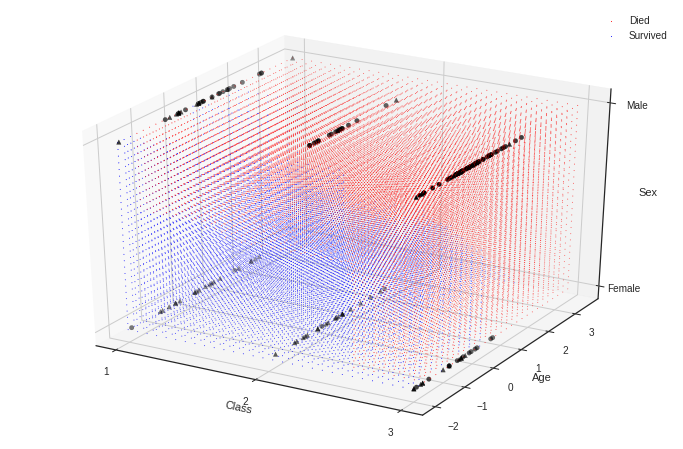

In [13]:
# Decision Boundaries


from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12,8))



ax = fig.add_subplot(111, projection='3d')
x_surf = np.linspace(np.min(X_test[:,0]), np.max(X_test[:,0]), 30)
y_surf = np.linspace(np.min(X_test[:,1]), np.max(X_test[:,1]),30)
z_surf = np.linspace(np.min(X_test[:,2]), np.max(X_test[:,2]),30)
x_surf, y_surf, z_surf = np.meshgrid(x_surf,y_surf, z_surf)

predicted_volume = classifier.predict(np.array([x_surf.ravel(), y_surf.ravel(),
                                                z_surf.ravel()]).T).reshape(x_surf.shape)


died_volume = np.where(np.asarray(predicted_volume.ravel())==0)
survived_volume = np.where(np.asarray(predicted_volume.ravel())==1)

ax.scatter(x_surf.ravel()[died_volume[0]], y_surf.ravel()[died_volume[0]],
                z_surf.ravel()[died_volume[0]],
             zdir='z', s=0.5, c='red',label = 'Died',depthshade=True)


ax.scatter(x_surf.ravel()[survived_volume[0]], y_surf.ravel()[survived_volume[0]],
                z_surf.ravel()[survived_volume[0]],
             zdir='z', s=0.5, c='blue',label = 'Survived',depthshade=True)

ax.set_xlabel('Class')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
ax.legend()
#ax.set_zticks([-1.33117269, 0.75121734]
ax.zaxis.set_ticks(np.unique(X_test[:,2]))
ax.zaxis.set_ticklabels(['Female','Male'])

ax.xaxis.set_ticks(np.unique(X_test[:,0]))
ax.xaxis.set_ticklabels(['1','2','3'])

p=ax.scatter(xs = X_test[died,0], ys =X_test[died,1], zs=X_test[died,2], 
             zdir='z', s=20, c='k',label = 'Died')
p=ax.scatter(xs = X_test[survived,0], ys =X_test[survived,1], zs=X_test[survived,2], 
             zdir='z', marker = '^', s=20, c='k',label = 'Survived')
plt.show()